In [1]:
from sklearn.datasets import fetch_openml 
from sklearn.metrics import confusion_matrix 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys


In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
echantillon = np.random.randint(70000,size=5000)
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = 0.7,test_size=0.3, random_state=42)

In [4]:
classifier = SVC()
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print(format(y_test))
print(len(y_test))
print(format(predicted))
print(len(predicted))
cm = confusion_matrix(y_test, predicted)
print(format(cm))

['7' '2' '1' ... '0' '5' '6']
1500
['7' '2' '1' ... '0' '3' '6']
1500
[[166   0   0   1   0   0   0   0   0   0]
 [  0 164   3   0   0   1   0   0   0   0]
 [  0   0 139   2   3   0   4   0   3   0]
 [  0   0   3 133   0   3   0   1   0   0]
 [  0   0   0   0 152   0   0   0   0   1]
 [  0   0   0   4   2 130   0   0   2   0]
 [  1   0   0   0   1   5 145   0   0   0]
 [  0   1   2   0   2   0   0 142   0   8]
 [  0   2   1   1   1   1   0   0 129   2]
 [  0   1   1   1   4   1   0   4   2 125]]


In [5]:
#'precomputed' not possible because
#If a callable is given it is used to pre-compute the 
#kernel matrix from data matrices; 
#that matrix should be an array of shape (n_samples, n_samples)

list_kernel=['linear','poly','rbf','sigmoid']
times_kernel = []
score_kernel = []
rappels_kernel = []
accuracys_kernel =[]
for i in list_kernel:
    
    starttime = time.time()
    
    classifier = SVC(kernel=i)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    
    endtime = time.time() 
    times_kernel.append(round((endtime - starttime)*1000,2))
    
    accuracy = classifier.score(X_train, y_train)
    accuracys_kernel.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_kernel.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_kernel.append(rappel_score)
    
    print(i," ",score)

linear   0.9133333333333333
poly   0.936
rbf   0.95
sigmoid   0.8726666666666667


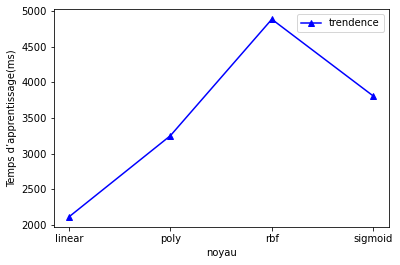

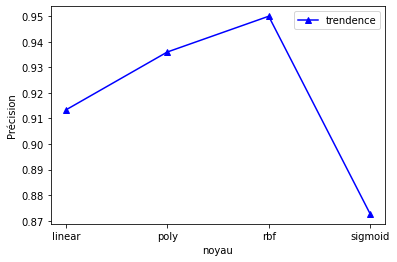

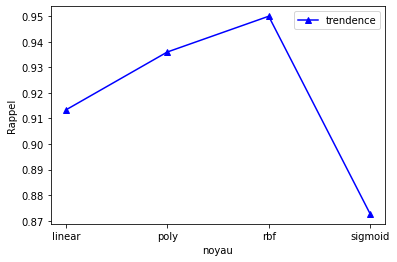

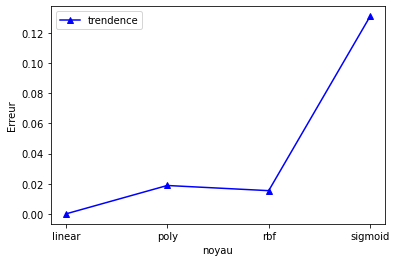

In [6]:
plt.plot(list_kernel,times_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.show()

plt.plot(list_kernel,score_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.show()

plt.plot(list_kernel,rappels_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.show()

plt.plot(list_kernel,accuracys_kernel, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.show()

In [7]:
tol_erreur=[x/10.0 for x in range(1,10,2)]
times_tol = []
score_tol = []
rappels_tol = []
accuracys_tol =[]
for i in tol_erreur:
    
    starttime = time.time()
    
    classifier = SVC(kernel='rbf',C=i)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    
    endtime = time.time() 
    times_tol.append(round((endtime - starttime)*1000,2))
    
    accuracy = classifier.score(X_train, y_train)
    accuracys_tol.append(1.0-accuracy)
    
    score = precision_score(y_test, predicted,average='micro')
    score_tol.append(score)
    
    rappel_score = recall_score(y_test, predicted,average='micro')
    rappels_tol.append(rappel_score)
    
    print(i," ",score)

0.1   0.9033333333333333
0.3   0.9306666666666666
0.5   0.942
0.7   0.948
0.9   0.9493333333333334


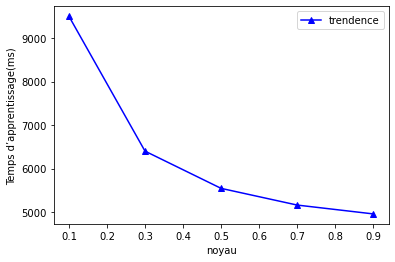

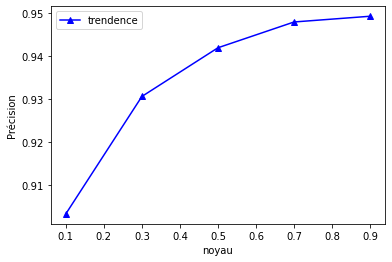

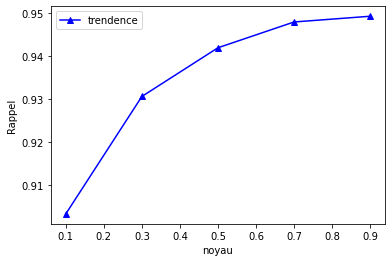

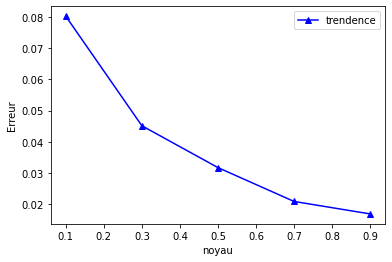

In [8]:
plt.plot(tol_erreur,times_tol, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Temps d’apprentissage(ms)')
plt.show()

plt.plot(tol_erreur,score_tol, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Précision')
plt.show()

plt.plot(tol_erreur,rappels_tol, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Rappel')
plt.show()

plt.plot(tol_erreur,accuracys_tol, 'b^-',label='trendence')
plt.legend()
#plt.set_title('relation between runtime and cluster number')
plt.xlabel('noyau')
plt.ylabel('Erreur')
plt.show()

